In [54]:
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16

In [58]:
def hists(filenames: List[str]):
    fig, axs = plt.subplots(1, 3, figsize=(16, 6)) 
    common_settings = {'bins': 20, 'alpha': 0.7, 'grid': True}

    for i, filename in enumerate(filenames):
        df = pd.read_csv(filename)

        df['context'].apply(len).plot.hist(ax=axs[i], 
                                            title=filename.split('.')[0].split('_')[1], 
                                            color='darkblue', **common_settings)
        if i == 0:
            axs[0].set_ylabel("Liczba przypadków")
        else:
            axs[i].set_ylabel(None)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85) 
    plt.suptitle("Długość kontekstu", fontsize=22) 
    fig.savefig("files/charts/others/combined_hist.png")

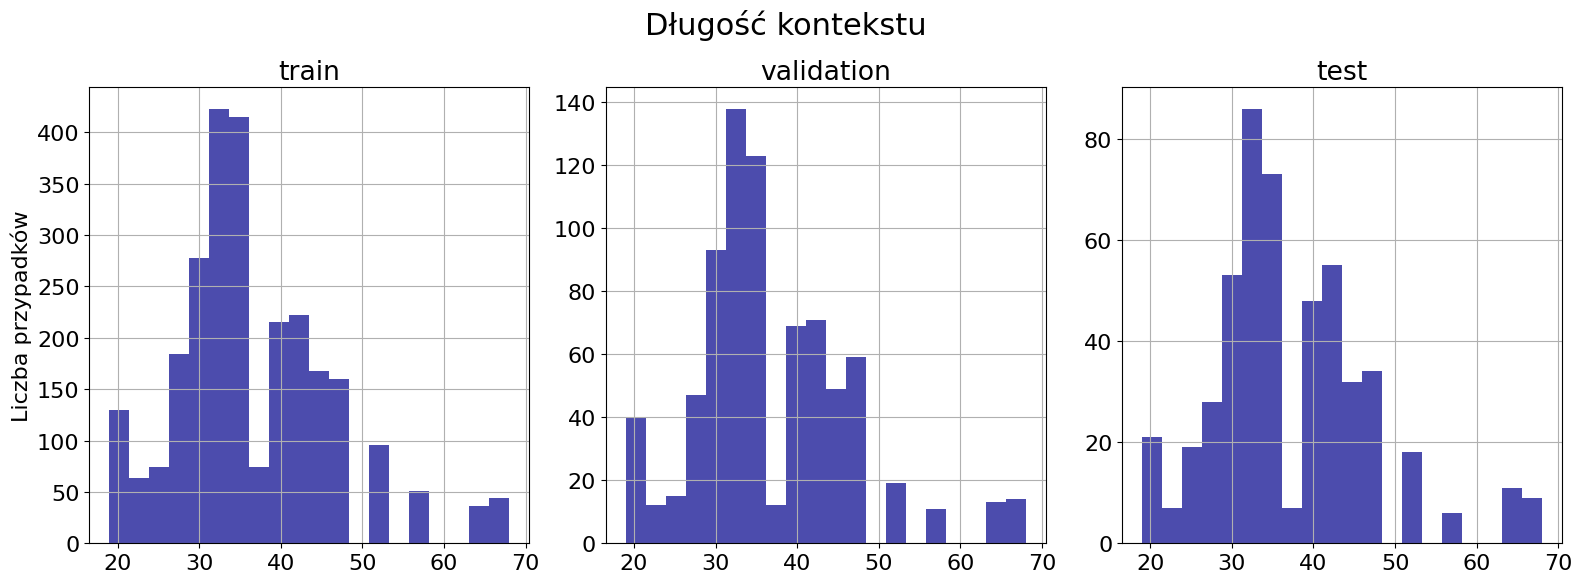

In [59]:
hists(['files/out_train.csv', 'files/out_validation.csv', 'files/out_test.csv'])

In [16]:
# PONIŻEJ ZNAJDUJE SIĘ FUNKCJA WYKONYWANA NA OBRAZACH OPTUNY
from PIL import Image
from os import listdir

def crop_images(path):
    for f in listdir(path):
    #    if f in ['roberta-base_plot_contour.png', 't5-base_plot_optimization_history.png']:
    #        continue
        im = Image.open(path + f)

        width, height = im.size
        top = height / 8
        im1 = im.crop((0, top, width, height))
        
        im1.save(path + f)


crop_images('files/charts/optuna/')

roberta-base_plot_contour.png
t5-base_plot_optimization_history.png
t5-base_plot_param_importances.png
bert-base-uncased_plot_contour.png
bert-base-uncased_plot_param_importances.png
roberta-base_plot_optimization_history.png
roberta-base_plot_param_importances.png
bert-base-uncased_plot_optimization_history.png
t5-base_plot_contour.png


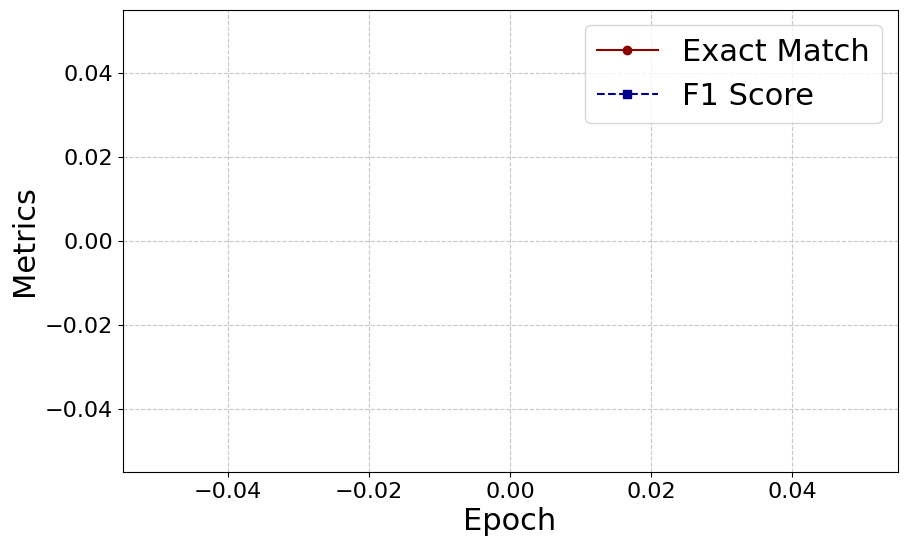

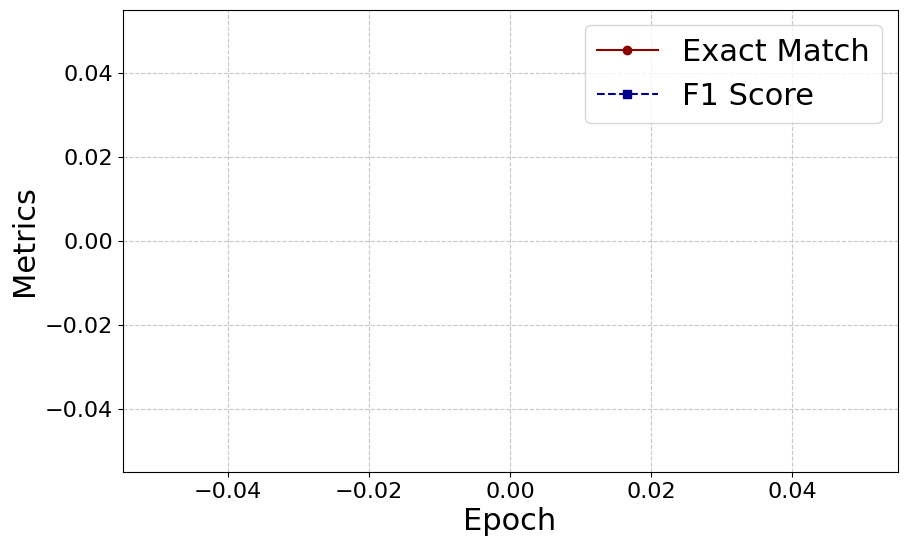

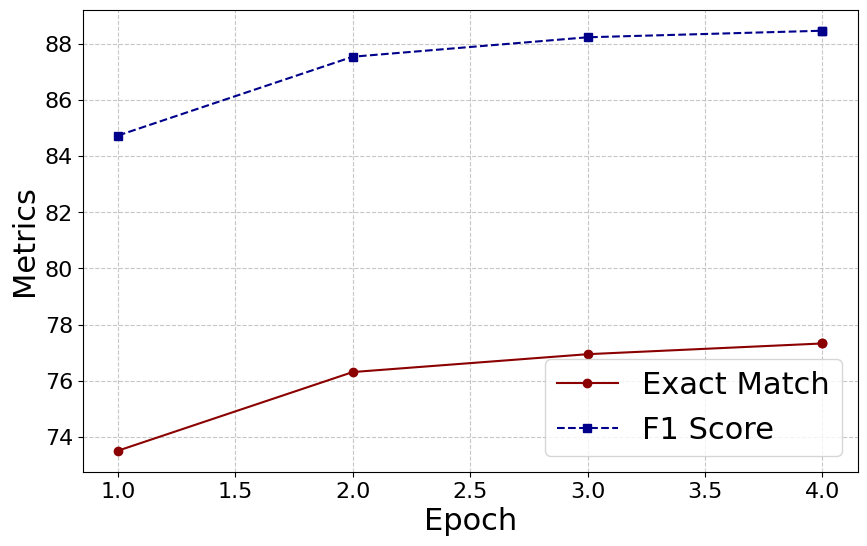

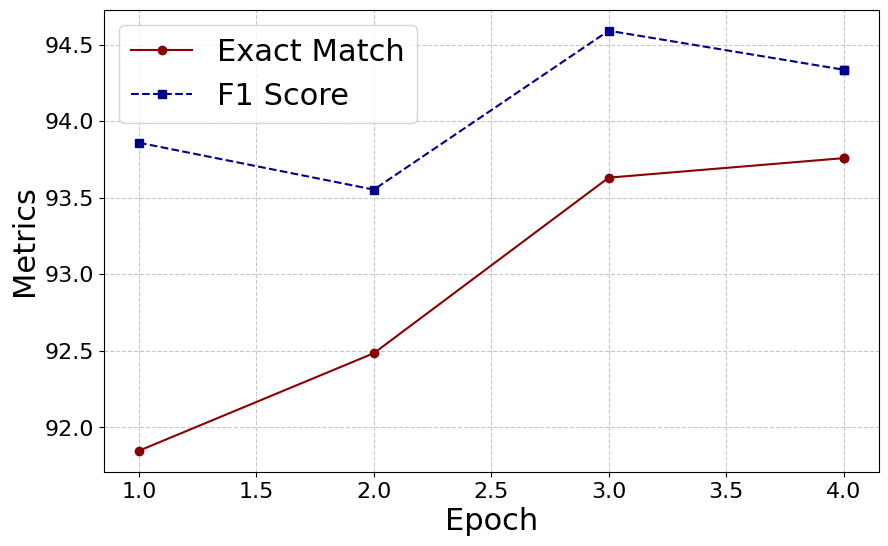

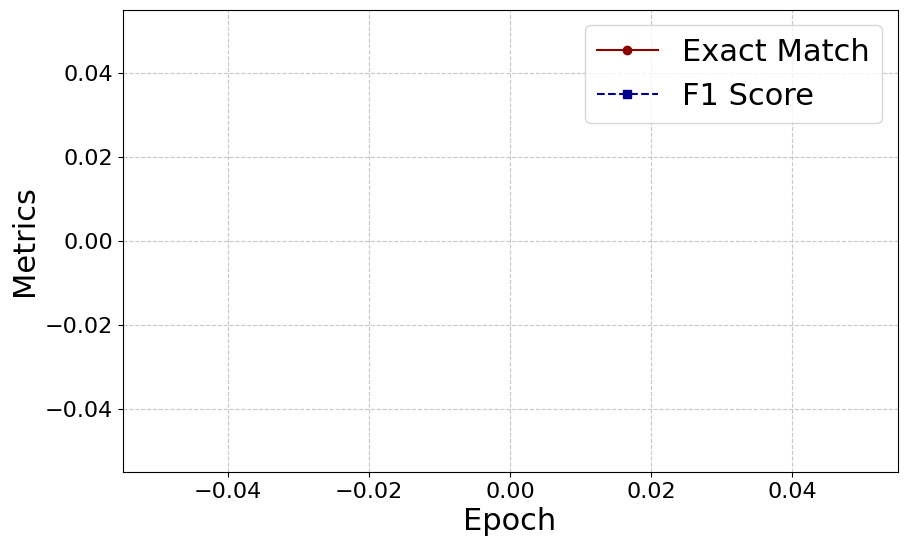

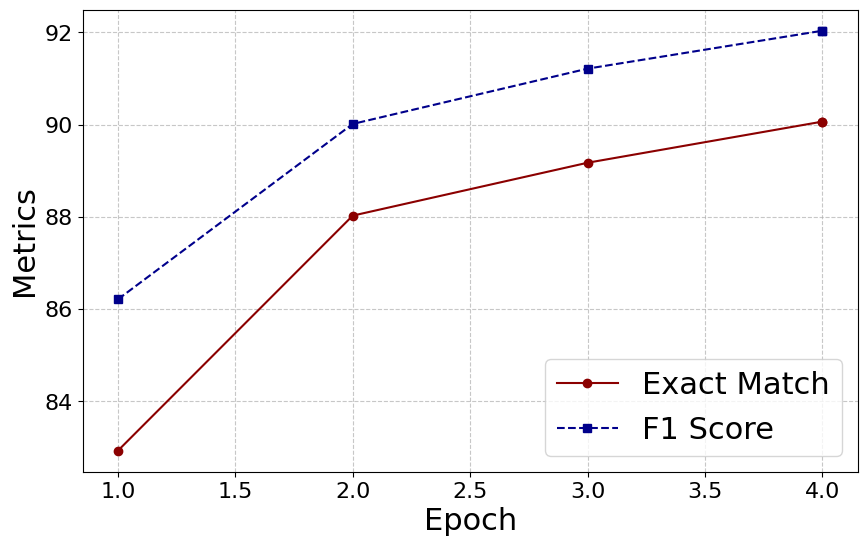

In [17]:
from os import listdir
import matplotlib.pyplot as plt
import json


def read_epochs_val(file_path):
    epochs = []

    with open(file_path, 'r') as fh:
        for line in fh:
            line = line.strip()
            try:
                data = json.loads(line)

                if isinstance(data, dict):
                    epochs.append(data)
            except json.JSONDecodeError:
                continue

    return epochs


def training_charts(path):
    for f in listdir(path):
        epoch_data = read_epochs_val('files/train_metrics/' + f)

        epochs = [data["epoch"] for data in epoch_data]
        eval_exact_match = [data["eval_exact_match"] for data in epoch_data]
        eval_f1 = [data["eval_f1"] for data in epoch_data]

        plt.figure(figsize=(10, 6)) 
        plt.plot(epochs, eval_exact_match, marker='o', linestyle='-', color='darkred', label='Exact Match')  
        plt.plot(epochs, eval_f1, marker='s', linestyle='--', color='darkblue', label='F1 Score')  

        plt.xlabel('Epoch', fontsize=22)  
        plt.ylabel('Metrics', fontsize=22) 
        plt.xticks(fontsize=16) 
        plt.yticks(fontsize=16)  

        plt.legend(fontsize=22)  
        plt.grid(True, linestyle='--', alpha=0.7) 

        plt.savefig('evaluation_metrics_plot.png', ) 

        plt.savefig('files/charts/train/' + f.replace('txt', 'png'), dpi=300, bbox_inches='tight')

training_charts('files/train_metrics/')